### imports

In [2]:
import math
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

2022-10-15 17:50:39.563244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
dataset = pd.read_csv("Formatted_Data.csv", low_memory=False)
dataset.head()

,BHK,Rent,Size,Super Area,Carpet Area,Built Area,Mumbai,Chennai,Bangalore,Hyderabad,...,Semi-Furnished,Unfurnished,Furnished,Bachelors/Family,Bachelors,Family,Bathroom,Contact Owner,Contact Agent,Contact Builder
0,2,13000,1000,1,0,0,0,0,0,1,...,0,0,1,1,0,0,2,1,0,0
1,2,36000,690,0,1,0,1,0,0,0,...,1,0,0,0,1,0,2,0,1,0
2,1,5000,350,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
3,2,14000,500,1,0,0,0,0,1,0,...,1,0,0,1,0,0,2,1,0,0
4,2,16500,1200,1,0,0,0,0,1,0,...,1,0,0,1,0,0,2,1,0,0


### training and test set

In [4]:
training_set_size = int(len(dataset.index) * 0.85)
training_set = dataset[:training_set_size]
test_set = dataset[training_set_size:]

In [5]:
len(training_set.index)

4034

In [6]:
len(test_set.index)

712

## Area Type Classification

In [7]:
area_types = ['Super Area', 'Carpet Area', 'Built Area']
area_type_features = training_set.copy()
area_type_labels = pd.concat([area_type_features.pop(x) for x in area_types], axis=1)

In [8]:
area_type_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   BHK               4034 non-null   int64
 1   Rent              4034 non-null   int64
 2   Size              4034 non-null   int64
 3   Mumbai            4034 non-null   int64
 4   Chennai           4034 non-null   int64
 5   Bangalore         4034 non-null   int64
 6   Hyderabad         4034 non-null   int64
 7   Delhi             4034 non-null   int64
 8   Kolkata           4034 non-null   int64
 9   Semi-Furnished    4034 non-null   int64
 10  Unfurnished       4034 non-null   int64
 11  Furnished         4034 non-null   int64
 12  Bachelors/Family  4034 non-null   int64
 13  Bachelors         4034 non-null   int64
 14  Family            4034 non-null   int64
 15  Bathroom          4034 non-null   int64
 16  Contact Owner     4034 non-null   int64
 17  Contact Agent     4034 non-null  

In [9]:
area_type_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Super Area   4034 non-null   int64
 1   Carpet Area  4034 non-null   int64
 2   Built Area   4034 non-null   int64
dtypes: int64(3)
memory usage: 94.7 KB


### compile and train model

In [10]:
area_type_normalize = layers.Normalization()
area_type_normalize.adapt(area_type_features)
area_type_model = tf.keras.Sequential([
  area_type_normalize,
  # layers.Dense(256),
  # layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(3)
])
area_type_model.compile(
    optimizer='adam',
    loss = tf.keras.losses.MeanSquaredError(),
    # loss='categorical_crossentropy',
    metrics=['accuracy'])
area_type_model.fit(area_type_features, area_type_labels, epochs=100)

2022-10-15 17:50:45.049349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
127/127 [==============================] - 1s 2ms/step - loss: 0.1517 - accuracy: 0.7573
Epoch 2/100
127/127 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.8074
Epoch 3/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.8047
Epoch 4/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.8064
Epoch 5/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.8116
Epoch 6/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.8106
Epoch 7/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.8109
Epoch 8/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.8094
Epoch 9/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.8099
Epoch 10/100
127/127 [==============================] - 0s 1ms/step - loss: 0.0931 - accura

### evaluate model

In [11]:
area_type_test_features = test_set.copy()
area_type_test_labels = pd.concat([area_type_test_features.pop(x) for x in area_types], axis=1)

In [12]:
area_type_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 4034 to 4745
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   BHK               712 non-null    int64
 1   Rent              712 non-null    int64
 2   Size              712 non-null    int64
 3   Mumbai            712 non-null    int64
 4   Chennai           712 non-null    int64
 5   Bangalore         712 non-null    int64
 6   Hyderabad         712 non-null    int64
 7   Delhi             712 non-null    int64
 8   Kolkata           712 non-null    int64
 9   Semi-Furnished    712 non-null    int64
 10  Unfurnished       712 non-null    int64
 11  Furnished         712 non-null    int64
 12  Bachelors/Family  712 non-null    int64
 13  Bachelors         712 non-null    int64
 14  Family            712 non-null    int64
 15  Bathroom          712 non-null    int64
 16  Contact Owner     712 non-null    int64
 17  Contact Agent     712 non-null 

In [13]:
area_type_test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 4034 to 4745
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Super Area   712 non-null    int64
 1   Carpet Area  712 non-null    int64
 2   Built Area   712 non-null    int64
dtypes: int64(3)
memory usage: 16.8 KB


In [14]:
test_loss, test_acc = area_type_model.evaluate(area_type_test_features,  area_type_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

23/23 - 0s - loss: 808750720.0000 - accuracy: 0.8076 - 173ms/epoch - 8ms/step

Test accuracy: 0.807584285736084


### predict

In [15]:
area_type_probability_model = tf.keras.Sequential([
    area_type_model, 
    tf.keras.layers.Softmax()])

In [16]:
area_type_predictions = area_type_probability_model.predict(area_type_test_features)

23/23 [==============================] - 0s 1ms/step


In [17]:
area_type_predictions[0]

array([0.486, 0.28 , 0.234], dtype=float32)

In [18]:
np.argmax(area_type_predictions[0])

0

In [19]:
np.argmax(area_type_test_labels.iloc[0])

0

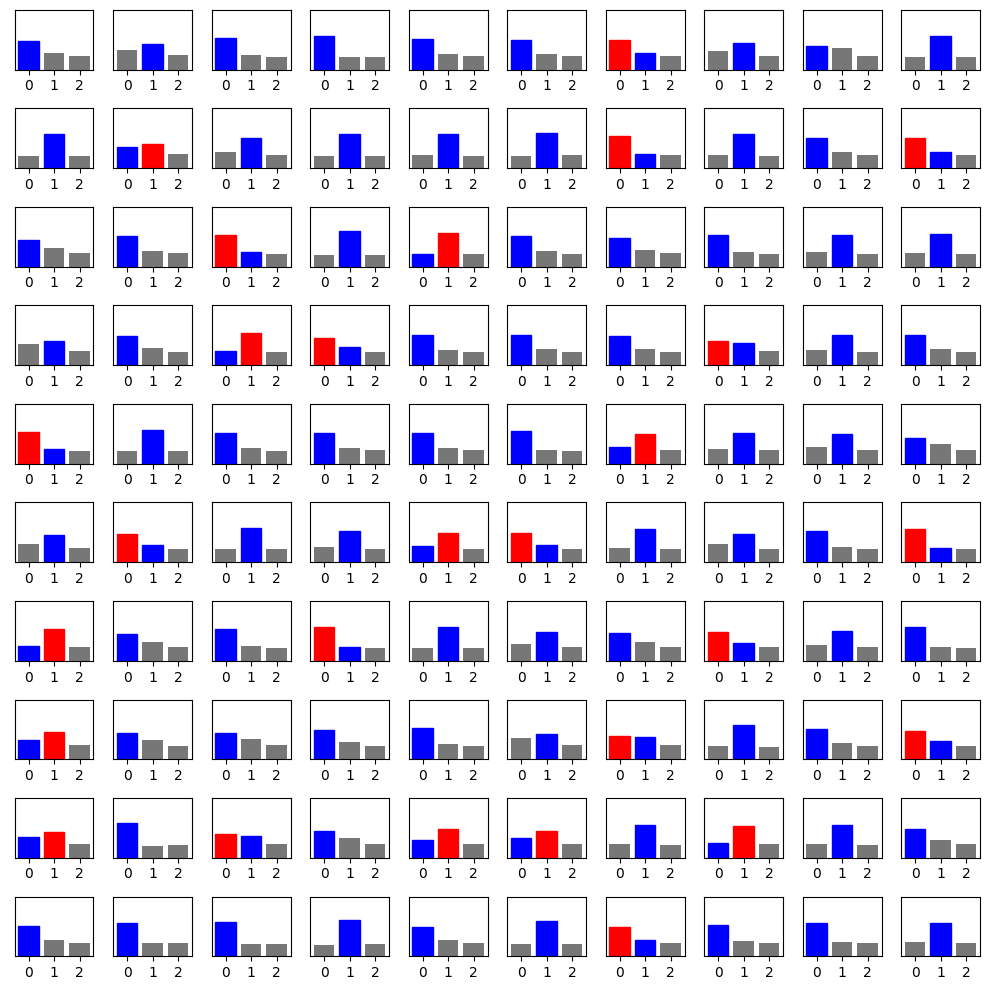

In [20]:
def plot_value_array(i, predictions_array, true_label_array):
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  true_label = np.argmax(true_label_array)
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_cols = 10
num_rows = 10
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_value_array(i, area_type_predictions[i], area_type_test_labels.iloc[i])
plt.tight_layout()
plt.show()